In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, sys
import math
import statistics

In [33]:
N = 500
steps = 100
b = 35
a = 0.69
alpha = np.random.normal(loc = 1.08, scale = 0.074, size = N) 
capital = np.random.uniform(low = 0.1, high = 10, size = N)

In [34]:
print(min(alpha))
print(max(alpha))

0.8462568816377337
1.3135943782988555


In [3]:
file1 = "Isocline_Correction_Initialization{}Steps{}Agents".format(steps,N)
file2 = "{}Steps{}Agents_Plots".format(steps,N)

# Exploring File1 Data: Initial Consumption Modified when isocline c > k or c < 0

In [4]:
data1 = pd.read_csv(file1 + "\Agent.csv")
data1

,Step,AgentID,slope,k_t,income,consumption,lamda,alpha,technology
0,0,0,-0.170881,7.484273,2.196416,0.176606,0.5,1.069771,H
1,0,1,-0.170302,8.423483,2.539360,0.209610,0.6,1.145795,H
2,0,2,-0.137735,5.769434,2.015028,0.561114,0.9,1.120242,H
3,0,3,-0.166424,8.018002,2.464560,0.268619,0.3,1.142203,H
4,0,4,-0.165283,6.971951,2.102000,0.251256,0.5,1.065053,H
...,...,...,...,...,...,...,...,...,...
50495,100,495,-0.181286,7.859301,2.147100,0.002025,0.7,1.026989,H
50496,100,496,-0.181387,8.906345,2.491019,0.000658,0.8,1.099343,H
50497,100,497,-0.181482,8.783035,2.448723,0.000163,0.3,1.090352,H
50498,100,498,-0.181463,10.571706,3.039457,0.000107,0.7,1.207515,H


In [ ]:
agent = random.randint(0,N-1)
time = (data1.loc[data1['AgentID']==agent, 'Step'].reset_index(drop = True)).to_numpy()
money = (data1.loc[data1['AgentID']==agent, 'k_t'].reset_index(drop = True)).to_numpy()
lamda = data1.loc[data1['AgentID'] == agent, 'lamda'].reset_index(drop = True)[0]
alpha = data1.loc[data1['AgentID'] == agent, 'alpha'].reset_index(drop = True)[0]

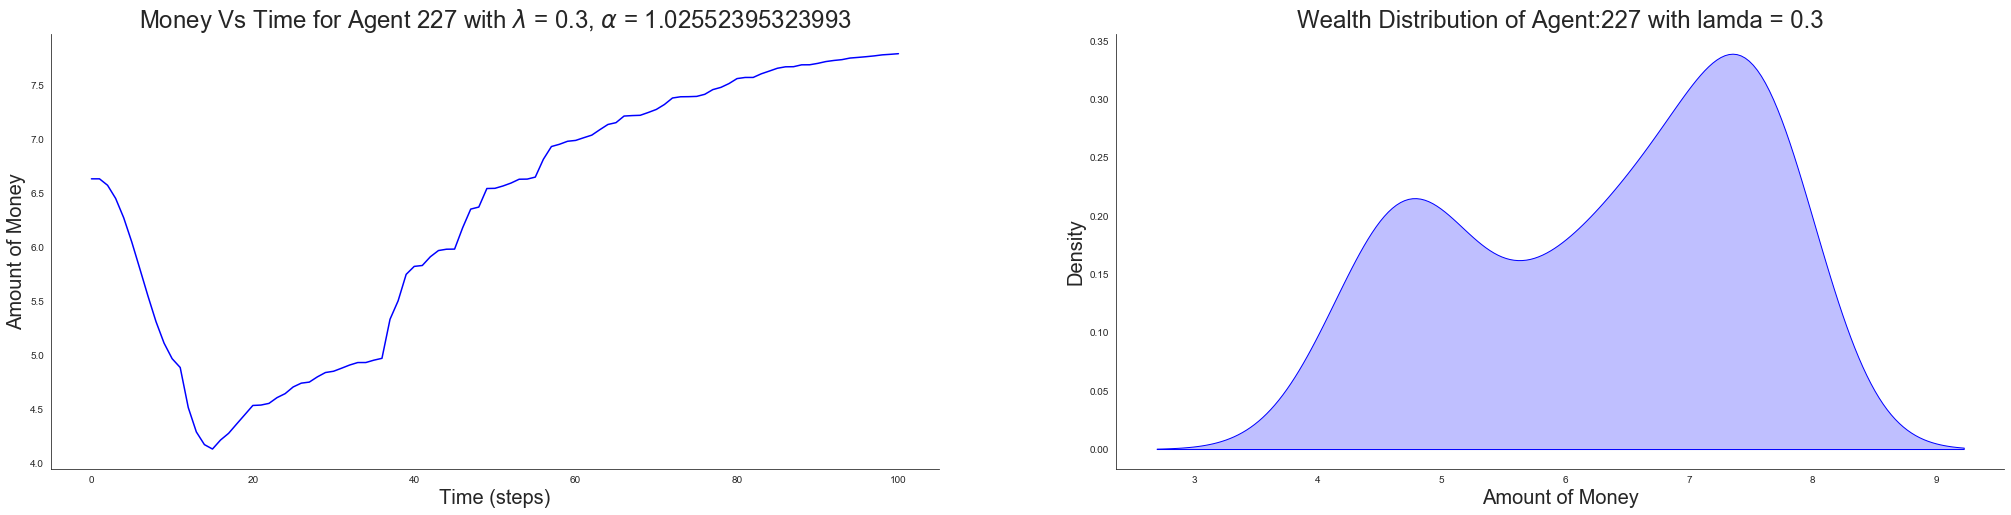

In [8]:
sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize =(35,8))
ax[0].plot(time,money, color = "blue")
ax[0].set_title("Money Vs Time for Agent {} with $\lambda$ = {}, $\\alpha$ = {}".format(agent,lamda,alpha), fontsize = 24)
ax[0].set_xlabel("Time (steps)", fontsize = 20)
ax[0].set_ylabel("Amount of Money", fontsize = 20)
#a = plt.gca()
#ax[0].yaxis.grid()
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

sns.kdeplot(money, fill =True, ax = ax[1], color = 'blue')
ax[1].set_title("Wealth Distribution of Agent:{} with lamda = {}".format(agent, lamda), fontsize = 24)
ax[1].set_xlabel("Amount of Money", fontsize = 20)
ax[1].set_ylabel("Density", fontsize = 20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.savefig(file1+"\Lamda{}_Agent{}.png".format(lamda,agent),bbox_inches='tight')

For agent 227, with the initial stock of capital of 6.632 and comparatively a better ability value 1.0255, the agent earns enough income to afford 'high' technology.The consumption of this agents increases in the next few steps (for 7 steps). Then consumption decreases owing to a decrease in capital, all the while investing in high technology. At step 11, the stock of capital decreases such that the agent can only afford low technology for the next 24 time steps.( Although the capital possessed by the agent is quite high compared to others around 4.27, it is not sufficient to invest in higher technology owing to the agent's higher capabilities) All this while the agent is still in the high capital area (4th quadrant) but the consumption decreases dramatically such that the agent accumulates the stock of capital, such that at time step 36, the agent is once again able to invest in high technology. After this point the agent continues to enjoy high stock of capital with a steady income and occational high and low incomes, all the while maintaining investment in high technology.

In [14]:
data1.loc[data1.AgentID==agent].tail(40)

,Step,AgentID,slope,k_t,income,consumption,lamda,alpha,technology
30727,61,227,-0.171592,7.012422,2.013692,0.119506,0.3,1.025524,H
31227,62,227,-0.171900,7.036491,2.017494,0.082302,0.3,1.025524,H
31727,63,227,-0.172198,7.087011,2.025450,0.076535,0.3,1.025524,H
32227,64,227,-0.172818,7.135172,2.033006,0.107309,0.3,1.025524,H
32727,65,227,-0.173402,7.152044,2.035647,0.049115,0.3,1.025524,H
33227,66,227,-0.173605,7.213130,2.045178,0.109379,0.3,1.025524,H
33727,67,227,-0.174335,7.217502,2.045858,0.110808,0.3,1.025524,H
34227,68,227,-0.174387,7.220122,2.046266,0.080963,0.3,1.025524,H
34727,69,227,-0.174418,7.246252,2.050327,0.073754,0.3,1.025524,H
35227,70,227,-0.174727,7.274500,2.054709,0.047014,0.3,1.025524,H


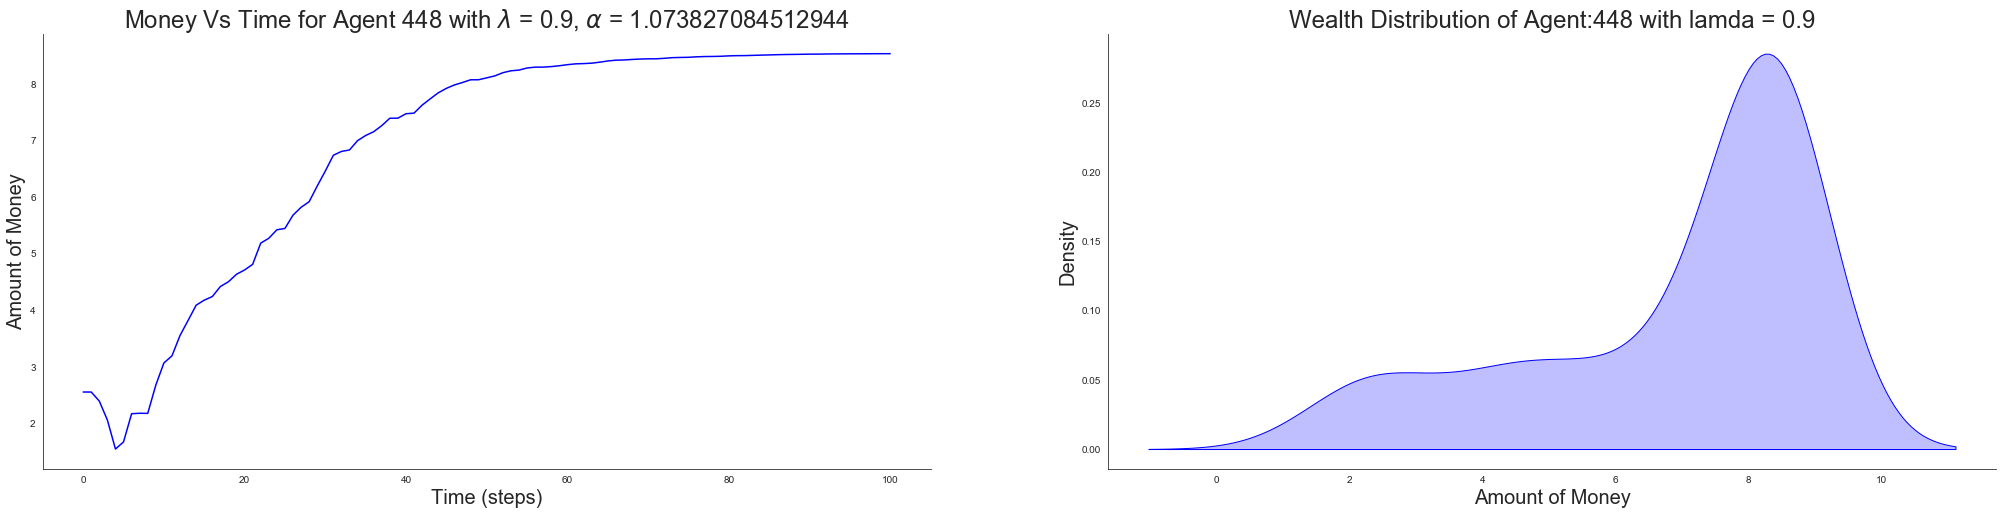

In [15]:
agent = random.randint(0,N-1)
time = (data1.loc[data1['AgentID']==agent, 'Step'].reset_index(drop = True)).to_numpy()
money = (data1.loc[data1['AgentID']==agent, 'k_t'].reset_index(drop = True)).to_numpy()
lamda = data1.loc[data1['AgentID'] == agent, 'lamda'].reset_index(drop = True)[0]
alpha = data1.loc[data1['AgentID'] == agent, 'alpha'].reset_index(drop = True)[0]

sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize =(35,8))
ax[0].plot(time,money, color = "blue")
ax[0].set_title("Money Vs Time for Agent {} with $\lambda$ = {}, $\\alpha$ = {}".format(agent,lamda,alpha), fontsize = 24)
ax[0].set_xlabel("Time (steps)", fontsize = 20)
ax[0].set_ylabel("Amount of Money", fontsize = 20)
#a = plt.gca()
#ax[0].yaxis.grid()
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

sns.kdeplot(money, fill =True, ax = ax[1], color = 'blue')
ax[1].set_title("Wealth Distribution of Agent:{} with lamda = {}".format(agent, lamda), fontsize = 24)
ax[1].set_xlabel("Amount of Money", fontsize = 20)
ax[1].set_ylabel("Density", fontsize = 20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.savefig(file1+"\Lamda{}_Agent{}.png".format(lamda,agent),bbox_inches='tight')

Agent 448, starts off with Low capital (2.5540) with a comparatively higher value for innate ability.(a comparatively higher consumption of 0.5798) But, this is not sufficient to be able to afford high technology and hence choses to invest in low technology. There is an increased consumption and a decrease in the stock of capital in the subsequent steps. But after the initial hiccup, the agent starts accumulating capital and a reduction in consumption can also be seen during those time steps. Finally at time step 21, the agent is able to invest in High technology and the capital increases and the consumption decreases.

In [18]:
data1.loc[data1.AgentID==agent].tail(30)

,Step,AgentID,slope,k_t,income,consumption,lamda,alpha,technology
35948,71,448,-0.180554,8.446538,2.355045,0.006884,0.9,1.073827,H
36448,72,448,-0.180558,8.455181,2.356336,0.001559,0.9,1.073827,H
36948,73,448,-0.180642,8.466835,2.358076,0.009228,0.9,1.073827,H
37448,74,448,-0.180755,8.470668,2.830402,0.010049,0.9,1.073827,H
37948,75,448,-0.180792,8.473291,2.359039,0.002289,0.9,1.073827,H
38448,76,448,-0.180817,8.481742,2.668128,0.005307,0.9,1.073827,H
38948,77,448,-0.180899,8.486556,2.744588,0.008606,0.9,1.073827,H
39448,78,448,-0.180946,8.488034,2.361238,0.006049,0.9,1.073827,H
39948,79,448,-0.180960,8.491344,2.361731,0.000648,0.9,1.073827,H
40448,80,448,-0.180992,8.498495,2.362796,0.003587,0.9,1.073827,H


<h3> NOTE: </h3> For the last 2 agents, a general observation is, once the agent invests in Low technology, which means they are experiencing poverty, they try to increase the stock of capital. Once they eventually overcome the poverty and invests in high technology, both agents showed a tendency to decrease their consumption and increase their stock of capital.

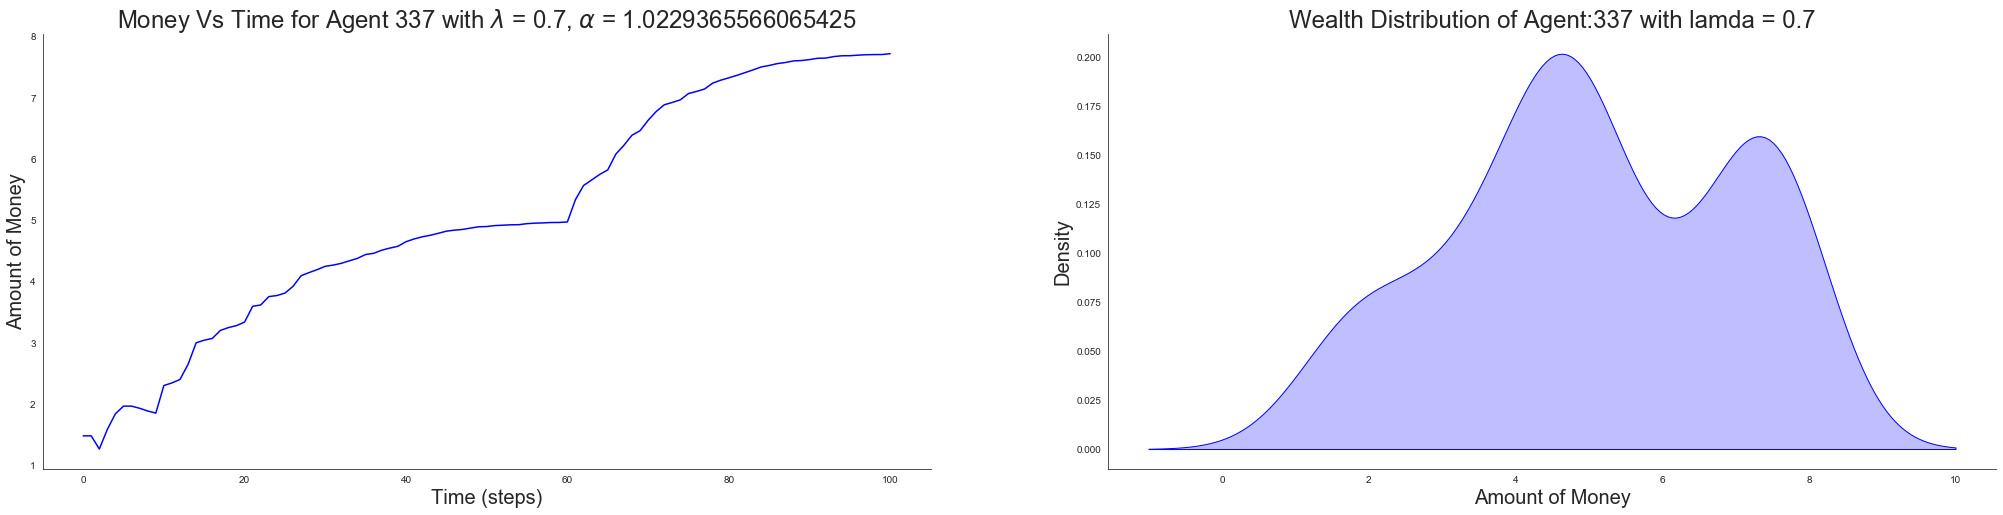

In [19]:
agent = random.randint(0,N-1)
time = (data1.loc[data1['AgentID']==agent, 'Step'].reset_index(drop = True)).to_numpy()
money = (data1.loc[data1['AgentID']==agent, 'k_t'].reset_index(drop = True)).to_numpy()
lamda = data1.loc[data1['AgentID'] == agent, 'lamda'].reset_index(drop = True)[0]
alpha = data1.loc[data1['AgentID'] == agent, 'alpha'].reset_index(drop = True)[0]

sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize =(35,8))
ax[0].plot(time,money, color = "blue")
ax[0].set_title("Money Vs Time for Agent {} with $\lambda$ = {}, $\\alpha$ = {}".format(agent,lamda,alpha), fontsize = 24)
ax[0].set_xlabel("Time (steps)", fontsize = 20)
ax[0].set_ylabel("Amount of Money", fontsize = 20)
#a = plt.gca()
#ax[0].yaxis.grid()
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

sns.kdeplot(money, fill =True, ax = ax[1], color = 'blue')
ax[1].set_title("Wealth Distribution of Agent:{} with lamda = {}".format(agent, lamda), fontsize = 24)
ax[1].set_xlabel("Amount of Money", fontsize = 20)
ax[1].set_ylabel("Density", fontsize = 20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.savefig(file1+"\Lamda{}_Agent{}.png".format(lamda,agent),bbox_inches='tight')

For this agent, the initial capital was really low around 1.48. It took many time steps for this agent to understand the trend, while the capital accumulated slowly, while consumption increased and all this while investing in low technology.The capital started accumulating slowly while the consumption started falling. This continued till the 60th step when the agent got in a position to invest in high technology. After this, for a brief period of 3 time steps, the consumption increased before following the trend of decreased consumption, increased capital accumulation.

In [25]:
data1.loc[data1.AgentID == agent].tail(50)

,Step,AgentID,slope,k_t,income,consumption,lamda,alpha,technology
25837,51,337,-0.229117,4.915532,1.649377,0.019144,0.7,1.022937,L
26337,52,337,-0.229337,4.922018,1.650029,0.017834,0.7,1.022937,L
26837,53,337,-0.229430,4.928361,1.650667,0.021746,0.7,1.022937,L
27337,54,337,-0.229520,4.930411,1.650873,0.002341,0.7,1.022937,L
27837,55,337,-0.229550,4.947608,1.652598,0.010144,0.7,1.022937,L
28337,56,337,-0.229794,4.955403,1.421840,0.013203,0.7,1.022937,L
28837,57,337,-0.229904,4.959317,1.653771,0.008704,0.7,1.022937,L
29337,58,337,-0.229960,4.966111,1.654450,0.014834,0.7,1.022937,L
29837,59,337,-0.230056,4.966750,1.654514,0.004827,0.7,1.022937,L
30337,60,337,-0.230065,4.975278,2.669399,0.008914,0.7,1.022937,H


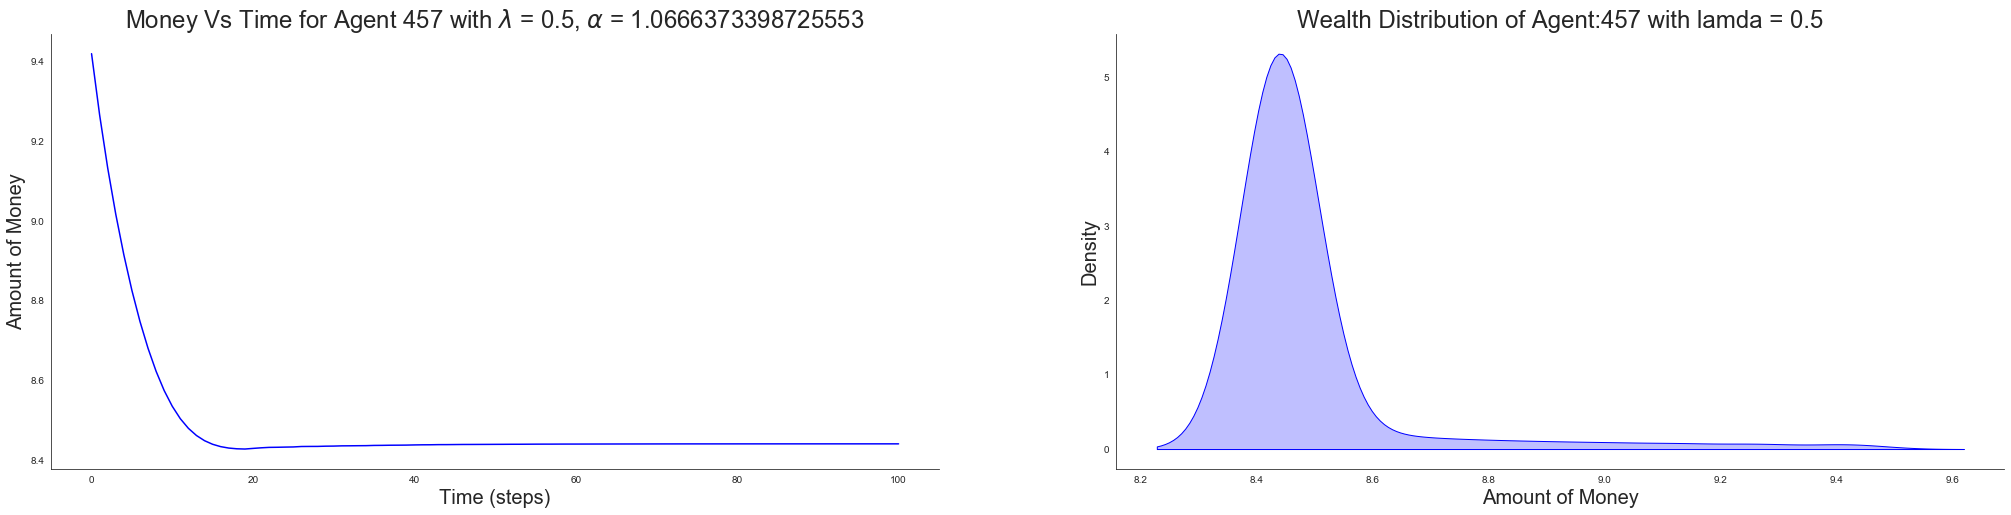

In [46]:
#agent = random.randint(0,N-1)
time = (data1.loc[data1['AgentID']==agent, 'Step'].reset_index(drop = True)).to_numpy()
money = (data1.loc[data1['AgentID']==agent, 'k_t'].reset_index(drop = True)).to_numpy()
lamda = data1.loc[data1['AgentID'] == agent, 'lamda'].reset_index(drop = True)[0]
alpha = data1.loc[data1['AgentID'] == agent, 'alpha'].reset_index(drop = True)[0]

sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize =(35,8))
ax[0].plot(time,money, color = "blue")
ax[0].set_title("Money Vs Time for Agent {} with $\lambda$ = {}, $\\alpha$ = {}".format(agent,lamda,alpha), fontsize = 24)
ax[0].set_xlabel("Time (steps)", fontsize = 20)
ax[0].set_ylabel("Amount of Money", fontsize = 20)
#a = plt.gca()
#ax[0].yaxis.grid()
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

sns.kdeplot(money, fill =True, ax = ax[1], color = 'blue')
ax[1].set_title("Wealth Distribution of Agent:{} with lamda = {}".format(agent, lamda), fontsize = 24)
ax[1].set_xlabel("Amount of Money", fontsize = 20)
ax[1].set_ylabel("Density", fontsize = 20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.savefig(file1+"\Lamda{}_Agent{}.png".format(lamda,agent),bbox_inches='tight')

This agent starts off with a good amount of money, and the consumption increases in the following time steps all the while investing in high technology. Once the agent senses a decrease in the stock of capital, then they minimize the amount of consumption so as to maintain a steady capital.

In [48]:
data1.loc[data1.AgentID==agent].head(30)

,Step,AgentID,slope,k_t,income,consumption,lamda,alpha,technology
457,0,457,-0.190202,9.420015,2.476443,0.010040,0.5,1.066637,H
957,1,457,-0.190202,9.266253,2.454850,0.013353,0.5,1.066637,H
1457,2,457,-0.188931,9.133160,1.924461,0.017234,0.5,1.066637,H
1957,3,457,-0.187804,9.017018,2.419427,0.021129,0.5,1.066637,H
2457,4,457,-0.186799,8.915163,3.687134,0.024575,0.5,1.066637,H
2957,5,457,-0.185902,8.825736,2.391873,0.026897,0.5,1.066637,H
3457,6,457,-0.185101,8.747723,2.380542,0.028073,0.5,1.066637,H
3957,7,457,-0.184391,8.680299,2.280541,0.028368,0.5,1.066637,H
4457,8,457,-0.183770,8.622568,2.362246,0.027213,0.5,1.066637,H
4957,9,457,-0.183233,8.574237,2.355141,0.024836,0.5,1.066637,H


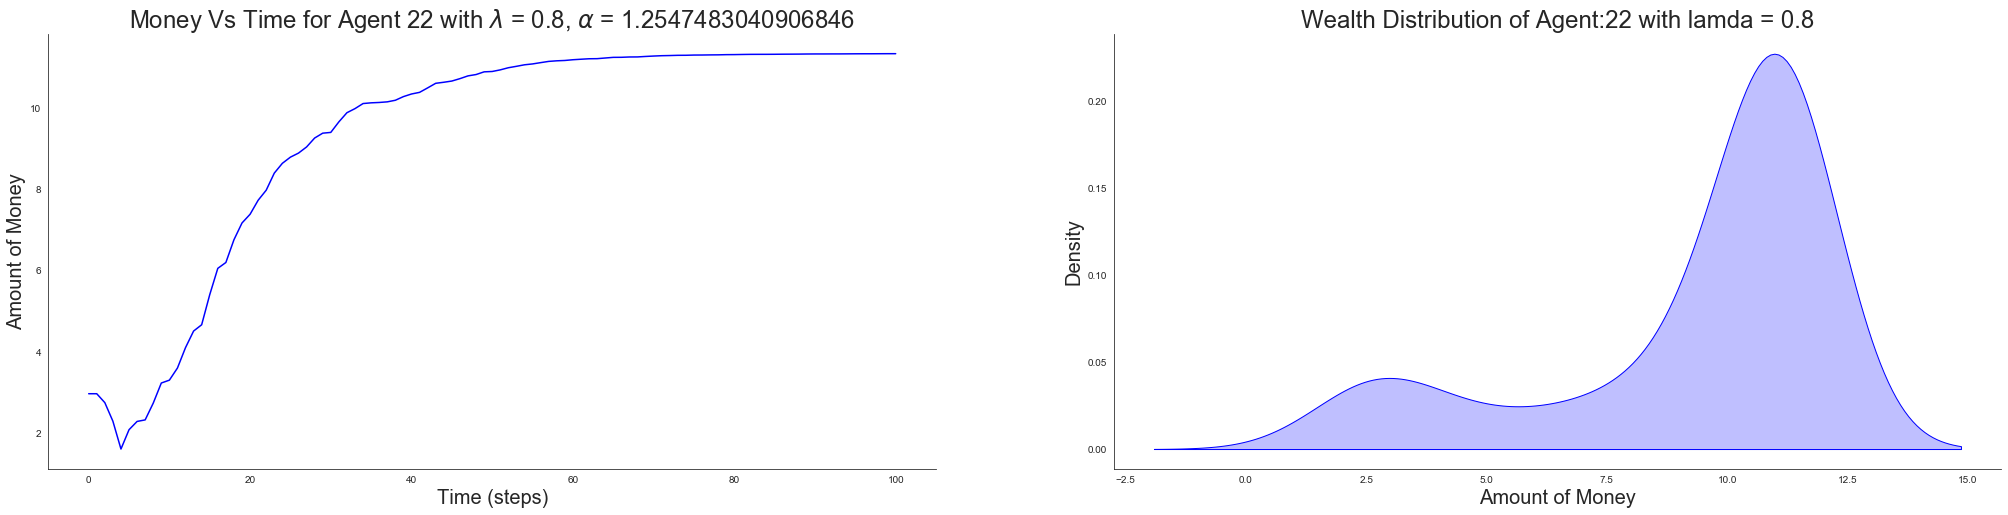

In [51]:
#agent = random.randint(0,N-1)
time = (data1.loc[data1['AgentID']==agent, 'Step'].reset_index(drop = True)).to_numpy()
money = (data1.loc[data1['AgentID']==agent, 'k_t'].reset_index(drop = True)).to_numpy()
lamda = data1.loc[data1['AgentID'] == agent, 'lamda'].reset_index(drop = True)[0]
alpha = data1.loc[data1['AgentID'] == agent, 'alpha'].reset_index(drop = True)[0]

sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize =(35,8))
ax[0].plot(time,money, color = "blue")
ax[0].set_title("Money Vs Time for Agent {} with $\lambda$ = {}, $\\alpha$ = {}".format(agent,lamda,alpha), fontsize = 24)
ax[0].set_xlabel("Time (steps)", fontsize = 20)
ax[0].set_ylabel("Amount of Money", fontsize = 20)
#a = plt.gca()
#ax[0].yaxis.grid()
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

sns.kdeplot(money, fill =True, ax = ax[1], color = 'blue')
ax[1].set_title("Wealth Distribution of Agent:{} with lamda = {}".format(agent, lamda), fontsize = 24)
ax[1].set_xlabel("Amount of Money", fontsize = 20)
ax[1].set_ylabel("Density", fontsize = 20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.savefig(file1+"\Lamda{}_Agent{}.png".format(lamda,agent),bbox_inches='tight')

<h3> General Observation </h3>
<ol> 
<li>An agent with low initial stock of capital and higher $\alpha$ can afford to invest in the   low technology in the begining, and once the agent becomes aware about what is going around them, starts to decrease consumption, so as to increase the stock of capital and income. The phase during which the agent becomes aware about 'what is happening around them', the agent often behave irrationally rather exploring the situations by higher consumption etc, eventually realising that a lower consumption is preferred to have a higher stock of capital. After this point it is all about accumulating stock of capital. Once the agent reaches a point where they invest in high technology, immediately the agent gets a bit confused in the next few time steps, with a higher consumption. Once again, I like to call it as 'exploring what's going around'. After this exploration phase consumption again decreases and hence maintaining a lower consumption and a steady capital accumulation. </li>
 
<li>Those agents with a higher capital and comparatively lower value for $\alpha$ tends to take longer time steps before arriving at this realization. </li>
 
<li>The saving propensity factor $\lambda$ aids an agent's capital accumulation behavior. An agent with higher $\lambda$ tends to accumulate more capital for themselves, hence taking fewer time steps to show the behavior explained in point 1 </li>
    
</ol>

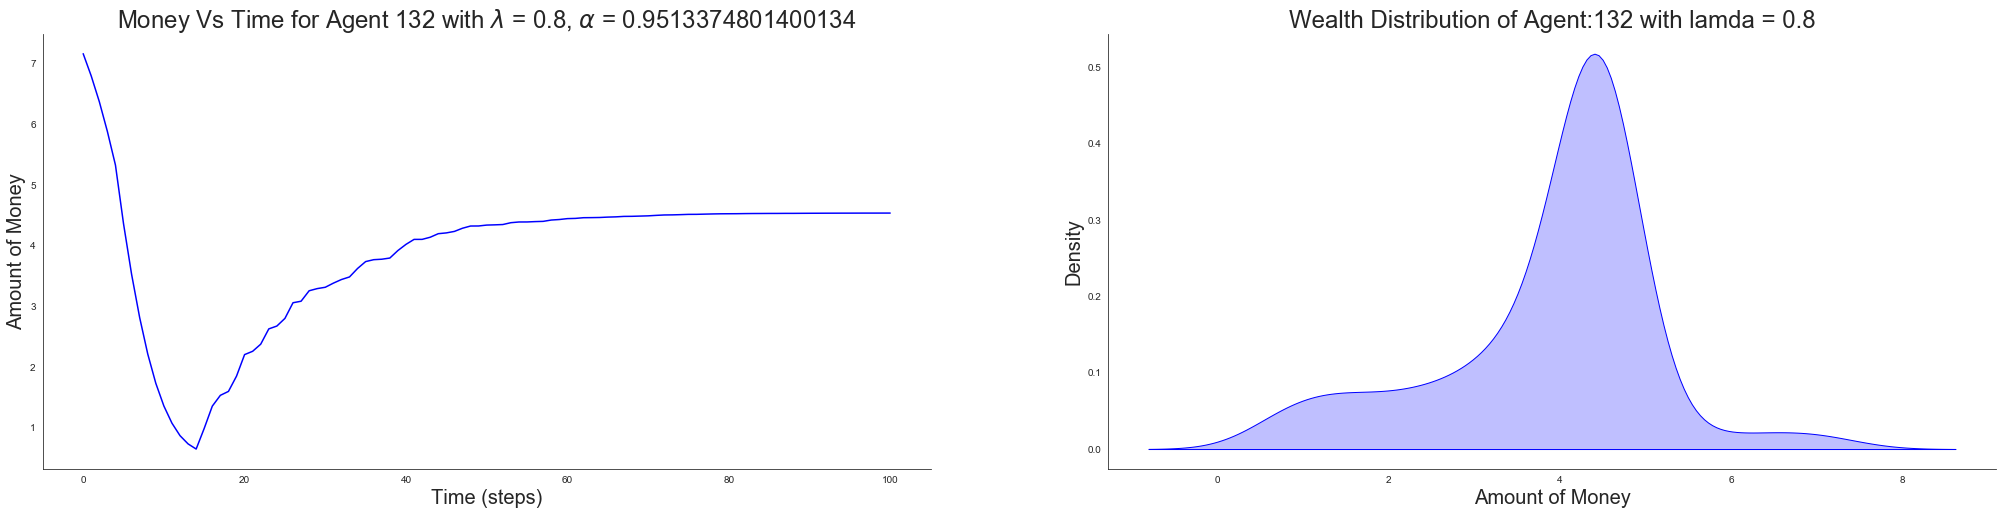

In [53]:
#agent = random.randint(0,N-1)
time = (data1.loc[data1['AgentID']==agent, 'Step'].reset_index(drop = True)).to_numpy()
money = (data1.loc[data1['AgentID']==agent, 'k_t'].reset_index(drop = True)).to_numpy()
lamda = data1.loc[data1['AgentID'] == agent, 'lamda'].reset_index(drop = True)[0]
alpha = data1.loc[data1['AgentID'] == agent, 'alpha'].reset_index(drop = True)[0]

sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize =(35,8))
ax[0].plot(time,money, color = "blue")
ax[0].set_title("Money Vs Time for Agent {} with $\lambda$ = {}, $\\alpha$ = {}".format(agent,lamda,alpha), fontsize = 24)
ax[0].set_xlabel("Time (steps)", fontsize = 20)
ax[0].set_ylabel("Amount of Money", fontsize = 20)
#a = plt.gca()
#ax[0].yaxis.grid()
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

sns.kdeplot(money, fill =True, ax = ax[1], color = 'blue')
ax[1].set_title("Wealth Distribution of Agent:{} with lamda = {}".format(agent, lamda), fontsize = 24)
ax[1].set_xlabel("Amount of Money", fontsize = 20)
ax[1].set_ylabel("Density", fontsize = 20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.savefig(file1+"\Lamda{}_Agent{}.png".format(lamda,agent),bbox_inches='tight')

Good example of how $\alpha$ is important in understanding in what's going around an agent. Here $\alpha$ overrides $\lambda$, however, once the agent is fully aware about what is happening around them, $\lambda$ helps to have a foothold and a stable stock of capital. Here, the choice of technology changes from high to low at the 4th time step and remains the same after that.

In [55]:
data1.loc[data1.AgentID==agent]

,Step,AgentID,slope,k_t,income,consumption,lamda,alpha,technology
132,0,132,-0.185057,7.164441,1.857632,0.403547,0.8,0.951337,H
632,1,132,-0.185057,6.796297,1.803498,0.539243,0.8,0.951337,H
1132,2,132,-0.180790,6.373478,1.739294,0.700341,0.8,0.951337,H
1632,3,132,-0.175425,5.882042,1.661652,0.863375,0.8,0.951337,H
2132,4,132,-0.168450,5.327805,1.571445,1.021248,0.8,0.951337,L
...,...,...,...,...,...,...,...,...,...
48132,96,132,-0.230966,4.536380,2.250244,0.000033,0.8,0.951337,L
48632,97,132,-0.230972,4.536696,1.497464,0.000323,0.8,0.951337,L
49132,98,132,-0.230977,4.536721,2.559211,0.000032,0.8,0.951337,L
49632,99,132,-0.230977,4.536974,2.398149,0.000114,0.8,0.951337,L


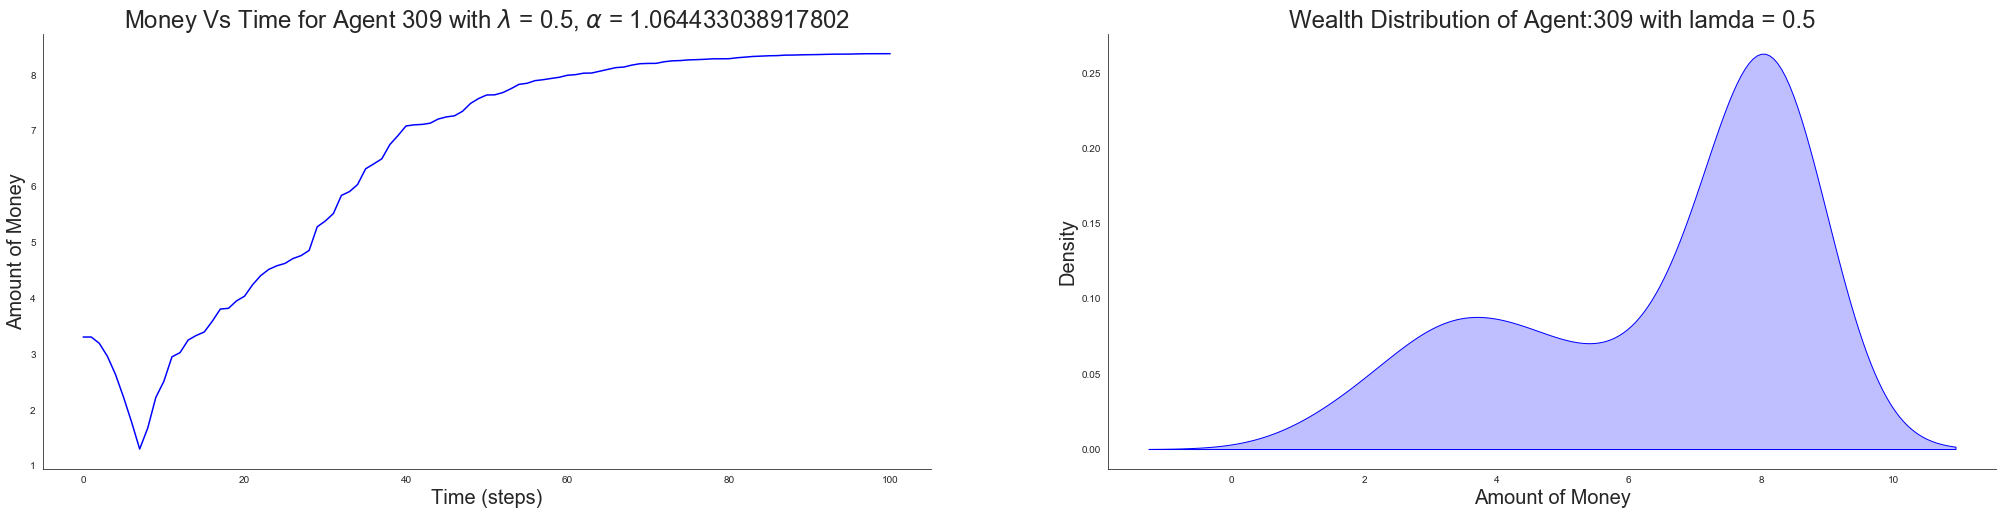

In [65]:
agent = random.randint(0,N-1)
time = (data1.loc[data1['AgentID']==agent, 'Step'].reset_index(drop = True)).to_numpy()
money = (data1.loc[data1['AgentID']==agent, 'k_t'].reset_index(drop = True)).to_numpy()
lamda = data1.loc[data1['AgentID'] == agent, 'lamda'].reset_index(drop = True)[0]
alpha = data1.loc[data1['AgentID'] == agent, 'alpha'].reset_index(drop = True)[0]

sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize =(35,8))
ax[0].plot(time,money, color = "blue")
ax[0].set_title("Money Vs Time for Agent {} with $\lambda$ = {}, $\\alpha$ = {}".format(agent,lamda,alpha), fontsize = 24)
ax[0].set_xlabel("Time (steps)", fontsize = 20)
ax[0].set_ylabel("Amount of Money", fontsize = 20)
#a = plt.gca()
#ax[0].yaxis.grid()
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

sns.kdeplot(money, fill =True, ax = ax[1], color = 'blue')
ax[1].set_title("Wealth Distribution of Agent:{} with lamda = {}".format(agent, lamda), fontsize = 24)
ax[1].set_xlabel("Amount of Money", fontsize = 20)
ax[1].set_ylabel("Density", fontsize = 20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
#plt.savefig(file1+"\Lamda{}_Agent{}.png".format(lamda,agent),bbox_inches='tight')

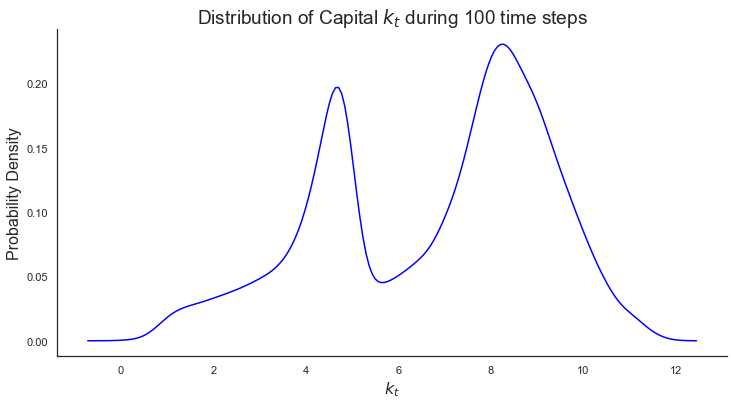

In [68]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("white")
sns.kdeplot(data1.k_t, color = "blue")
plt.xlabel("$k_t$", fontsize = 16)
plt.ylabel("Probability Density", fontsize = 16)
plt.title("Distribution of Capital $k_t$ during {} time steps".format(steps), fontsize = 19) 
a = plt.gca()
#plt.grid('on')
#a.yaxis.grid()
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)
plt.savefig(file1 +"\kdeplot_k");

# Investigating the model when -ve isocline initial consumption value is taken as 0.01

In [66]:
data2 = pd.read_csv(file2+"\Agent.csv")
data2

,Step,AgentID,slope,k_t,income,consumption,lamda,alpha,technology
0,0,0,-0.162536,7.468508,2.329347,0.314739,0.4,1.124573,H
1,0,1,-0.150739,6.325651,2.069872,0.432407,0.6,1.098705,H
2,0,2,0.488864,0.260314,0.710540,0.247527,0.5,1.063993,L
3,0,3,-0.180157,7.444402,2.028877,0.022224,0.3,1.004458,H
4,0,4,-0.156890,8.515790,2.825931,0.465720,0.9,1.249492,H
...,...,...,...,...,...,...,...,...,...
50495,100,495,-0.230997,4.587801,1.514019,0.000043,0.2,0.958628,L
50496,100,496,-0.230999,4.825538,0.834504,0.000004,0.2,0.993119,L
50497,100,497,-0.181267,8.666323,2.413877,0.001041,0.8,1.083749,H
50498,100,498,-0.181348,9.770224,2.777026,0.002205,0.9,1.157032,H


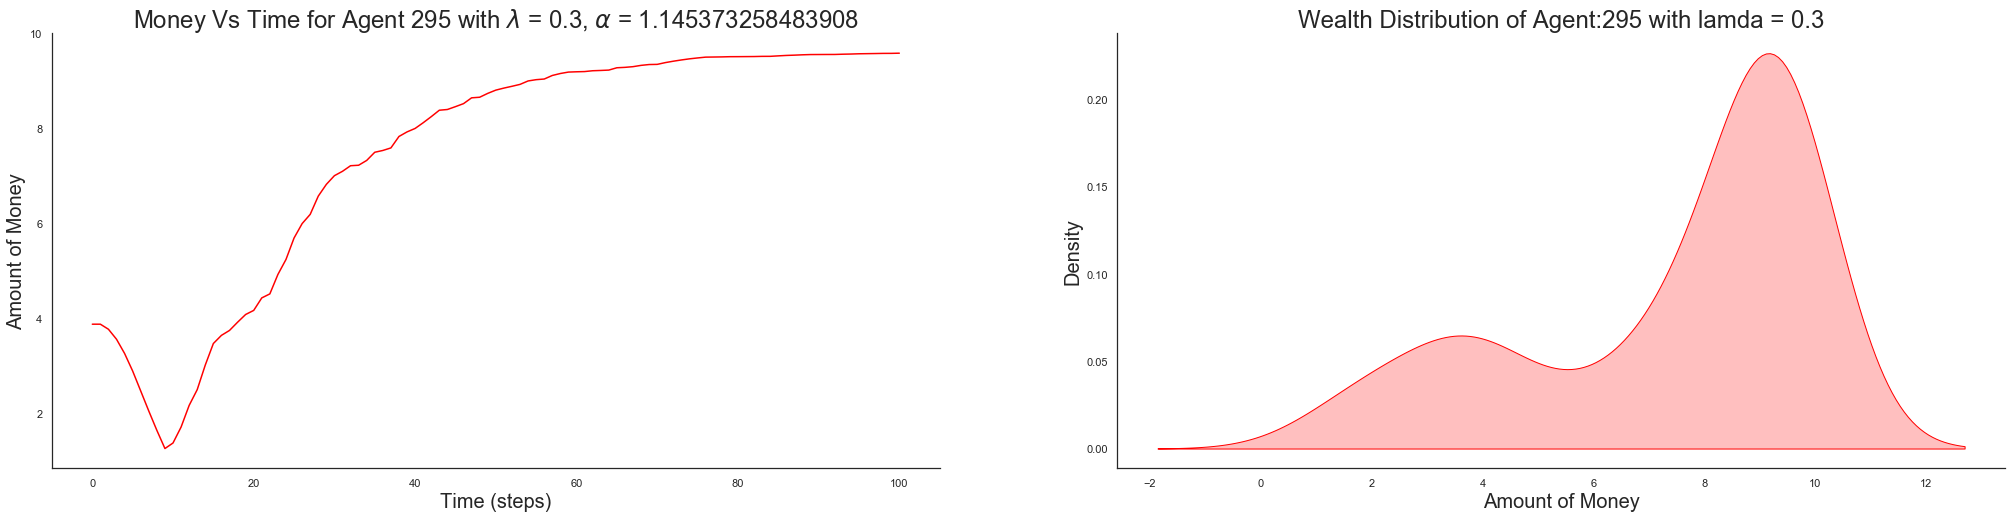

In [81]:
agent = random.randint(0,N-1)
time = (data2.loc[data2['AgentID']==agent, 'Step'].reset_index(drop = True)).to_numpy()
money = (data2.loc[data2['AgentID']==agent, 'k_t'].reset_index(drop = True)).to_numpy()
lamda = data2.loc[data2['AgentID'] == agent, 'lamda'].reset_index(drop = True)[0]
alpha = data2.loc[data2['AgentID'] == agent, 'alpha'].reset_index(drop = True)[0]

sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize =(35,8))
ax[0].plot(time,money, color = "red")
ax[0].set_title("Money Vs Time for Agent {} with $\lambda$ = {}, $\\alpha$ = {}".format(agent,lamda,alpha), fontsize = 24)
ax[0].set_xlabel("Time (steps)", fontsize = 20)
ax[0].set_ylabel("Amount of Money", fontsize = 20)
#a = plt.gca()
#ax[0].yaxis.grid()
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

sns.kdeplot(money, fill =True, ax = ax[1], color = 'red')
ax[1].set_title("Wealth Distribution of Agent:{} with lamda = {}".format(agent, lamda), fontsize = 24)
ax[1].set_xlabel("Amount of Money", fontsize = 20)
ax[1].set_ylabel("Density", fontsize = 20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.savefig(file2+"\Lamda{}_Agent{}.png".format(lamda,agent),bbox_inches='tight')

In [82]:
data2.loc[data2.AgentID == agent]

,Step,AgentID,slope,k_t,income,consumption,lamda,alpha,technology
295,0,295,-0.196766,3.870705,1.719032,0.441700,0.3,1.145373,L
795,1,295,-0.196766,3.870705,1.719032,0.574995,0.3,1.145373,L
1295,2,295,-0.196766,3.764069,1.704686,0.725888,0.3,1.145373,L
1795,3,295,-0.194135,3.553393,0.632679,0.877340,0.3,1.145373,L
2295,4,295,-0.188545,3.253812,0.410735,1.021004,0.3,1.145373,L
...,...,...,...,...,...,...,...,...,...
48295,96,295,-0.181200,9.574837,5.798633,0.002852,0.3,1.145373,H
48795,97,295,-0.181222,9.577279,2.715964,0.001632,0.3,1.145373,H
49295,98,295,-0.181243,9.580343,2.716420,0.004243,0.3,1.145373,H
49795,99,295,-0.181270,9.580875,2.716499,0.000042,0.3,1.145373,H


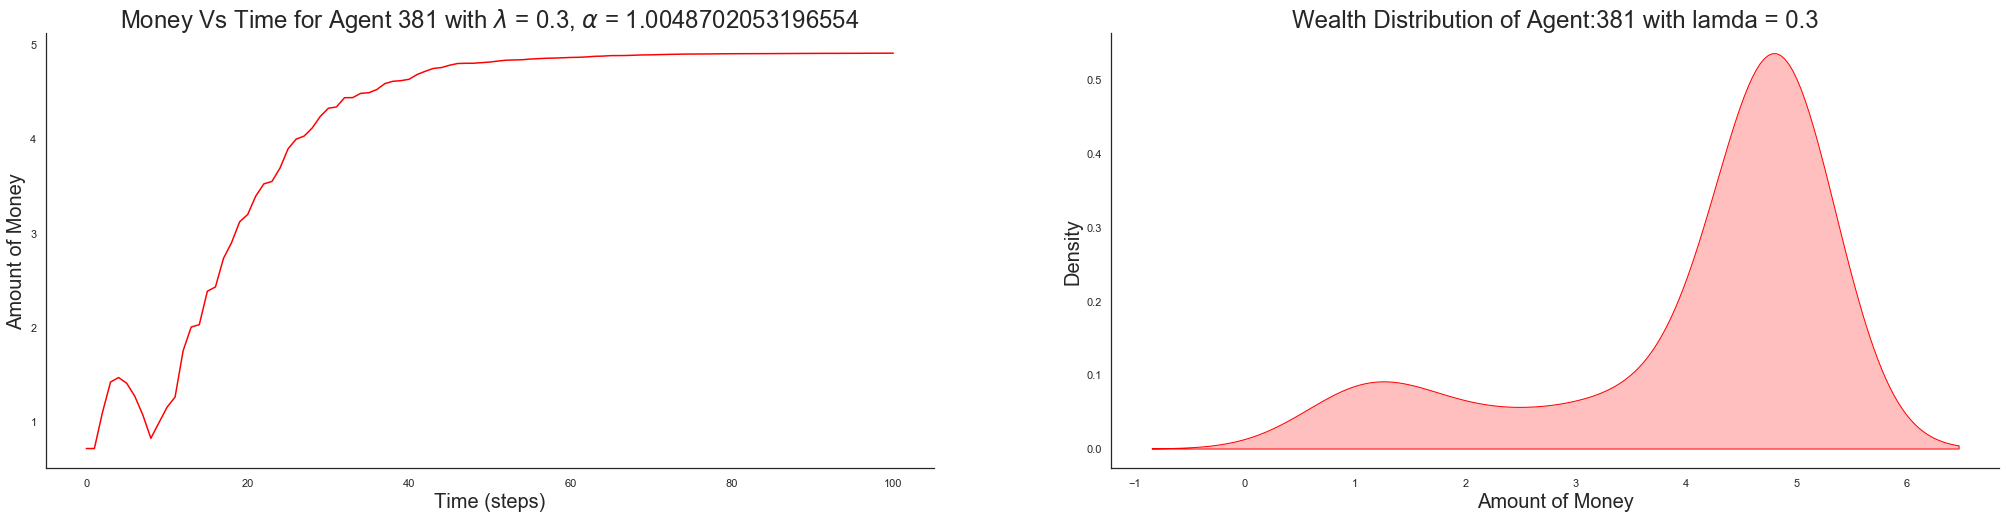

In [83]:
agent = random.randint(0,N-1)
time = (data2.loc[data2['AgentID']==agent, 'Step'].reset_index(drop = True)).to_numpy()
money = (data2.loc[data2['AgentID']==agent, 'k_t'].reset_index(drop = True)).to_numpy()
lamda = data2.loc[data2['AgentID'] == agent, 'lamda'].reset_index(drop = True)[0]
alpha = data2.loc[data2['AgentID'] == agent, 'alpha'].reset_index(drop = True)[0]

sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize =(35,8))
ax[0].plot(time,money, color = "red")
ax[0].set_title("Money Vs Time for Agent {} with $\lambda$ = {}, $\\alpha$ = {}".format(agent,lamda,alpha), fontsize = 24)
ax[0].set_xlabel("Time (steps)", fontsize = 20)
ax[0].set_ylabel("Amount of Money", fontsize = 20)
#a = plt.gca()
#ax[0].yaxis.grid()
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

sns.kdeplot(money, fill =True, ax = ax[1], color = 'red')
ax[1].set_title("Wealth Distribution of Agent:{} with lamda = {}".format(agent, lamda), fontsize = 24)
ax[1].set_xlabel("Amount of Money", fontsize = 20)
ax[1].set_ylabel("Density", fontsize = 20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
#plt.savefig(file2+"\Lamda{}_Agent{}.png".format(lamda,agent),bbox_inches='tight')

In [84]:
data2.loc[data2.AgentID==agent]

,Step,AgentID,slope,k_t,income,consumption,lamda,alpha,technology
381,0,381,0.051633,0.713991,0.908276,0.672659,0.3,1.00487,L
881,1,381,0.051633,0.713991,0.908276,0.196178,0.3,1.00487,L
1381,2,381,0.051633,1.095175,1.032655,0.266905,0.3,1.00487,L
1881,3,381,-0.047126,1.418648,1.116021,0.587719,0.3,1.00487,L
2381,4,381,-0.093996,1.466767,1.127245,0.718399,0.3,1.00487,L
...,...,...,...,...,...,...,...,...,...
48381,96,381,-0.230964,4.904950,1.110321,0.000116,0.3,1.00487,L
48881,97,381,-0.230965,4.905310,1.656815,0.000149,0.3,1.00487,L
49381,98,381,-0.230970,4.905577,0.988236,0.000055,0.3,1.00487,L
49881,99,381,-0.230974,4.905870,1.619291,0.000174,0.3,1.00487,L


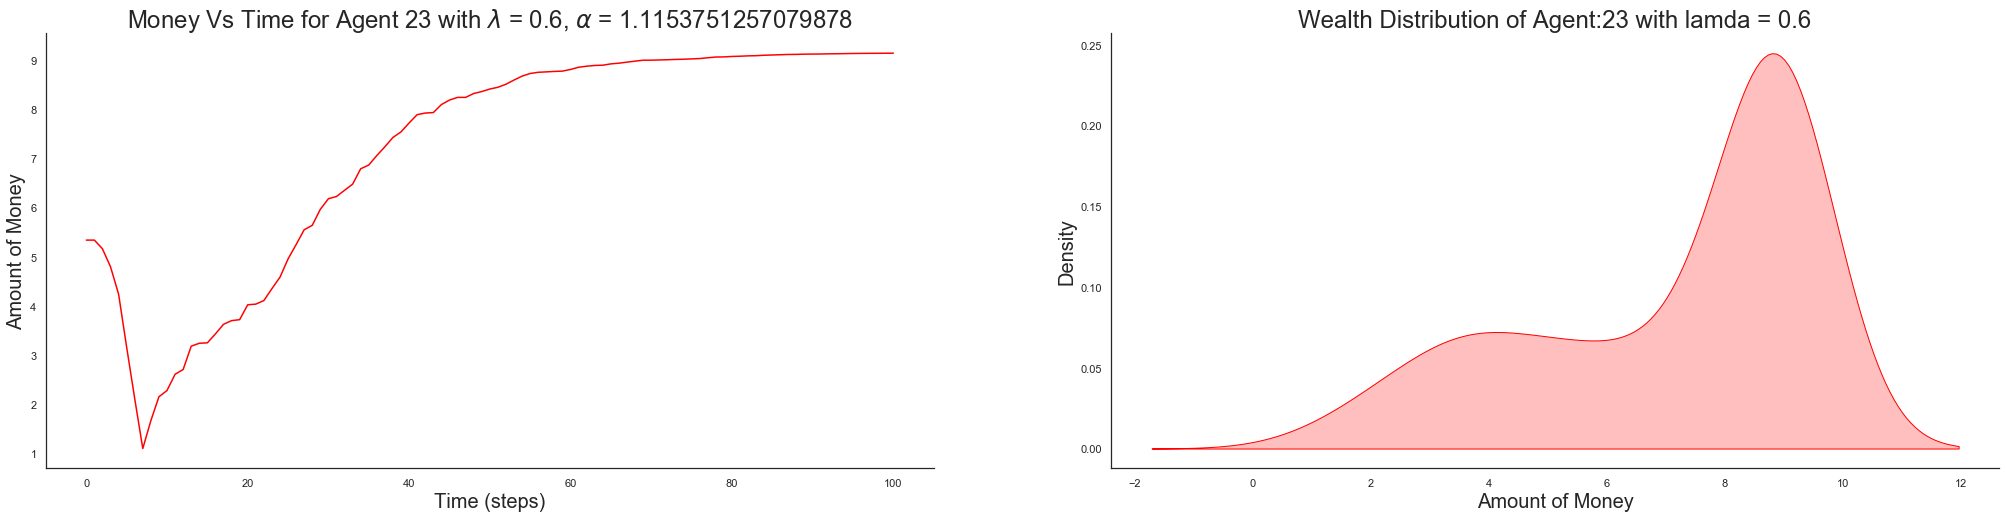

In [85]:
agent = random.randint(0,N-1)
time = (data2.loc[data2['AgentID']==agent, 'Step'].reset_index(drop = True)).to_numpy()
money = (data2.loc[data2['AgentID']==agent, 'k_t'].reset_index(drop = True)).to_numpy()
lamda = data2.loc[data2['AgentID'] == agent, 'lamda'].reset_index(drop = True)[0]
alpha = data2.loc[data2['AgentID'] == agent, 'alpha'].reset_index(drop = True)[0]

sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize =(35,8))
ax[0].plot(time,money, color = "red")
ax[0].set_title("Money Vs Time for Agent {} with $\lambda$ = {}, $\\alpha$ = {}".format(agent,lamda,alpha), fontsize = 24)
ax[0].set_xlabel("Time (steps)", fontsize = 20)
ax[0].set_ylabel("Amount of Money", fontsize = 20)
#a = plt.gca()
#ax[0].yaxis.grid()
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

sns.kdeplot(money, fill =True, ax = ax[1], color = 'red')
ax[1].set_title("Wealth Distribution of Agent:{} with lamda = {}".format(agent, lamda), fontsize = 24)
ax[1].set_xlabel("Amount of Money", fontsize = 20)
ax[1].set_ylabel("Density", fontsize = 20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.savefig(file2+"\Lamda{}_Agent{}.png".format(lamda,agent),bbox_inches='tight')

In [86]:
data2.loc[data2.AgentID==agent]

,Step,AgentID,slope,k_t,income,consumption,lamda,alpha,technology
23,0,23,-0.130214,5.338215,1.920005,0.608394,0.6,1.115375,H
523,1,23,-0.130214,5.338215,1.409888,0.829028,0.6,1.115375,H
1023,2,23,-0.130214,5.161708,1.884415,1.088621,0.6,1.115375,H
1523,3,23,-0.126485,4.795652,2.371462,1.370217,0.6,1.115375,H
2023,4,23,-0.118082,4.240152,1.673551,1.671196,0.6,1.115375,L
...,...,...,...,...,...,...,...,...,...
48023,96,23,-0.181328,9.137424,2.568503,0.001689,0.6,1.115375,H
48523,97,23,-0.181345,9.138596,2.568677,0.001773,0.6,1.115375,H
49023,98,23,-0.181355,9.139530,1.528753,0.001178,0.6,1.115375,H
49523,99,23,-0.181364,9.140805,2.569006,0.001493,0.6,1.115375,H


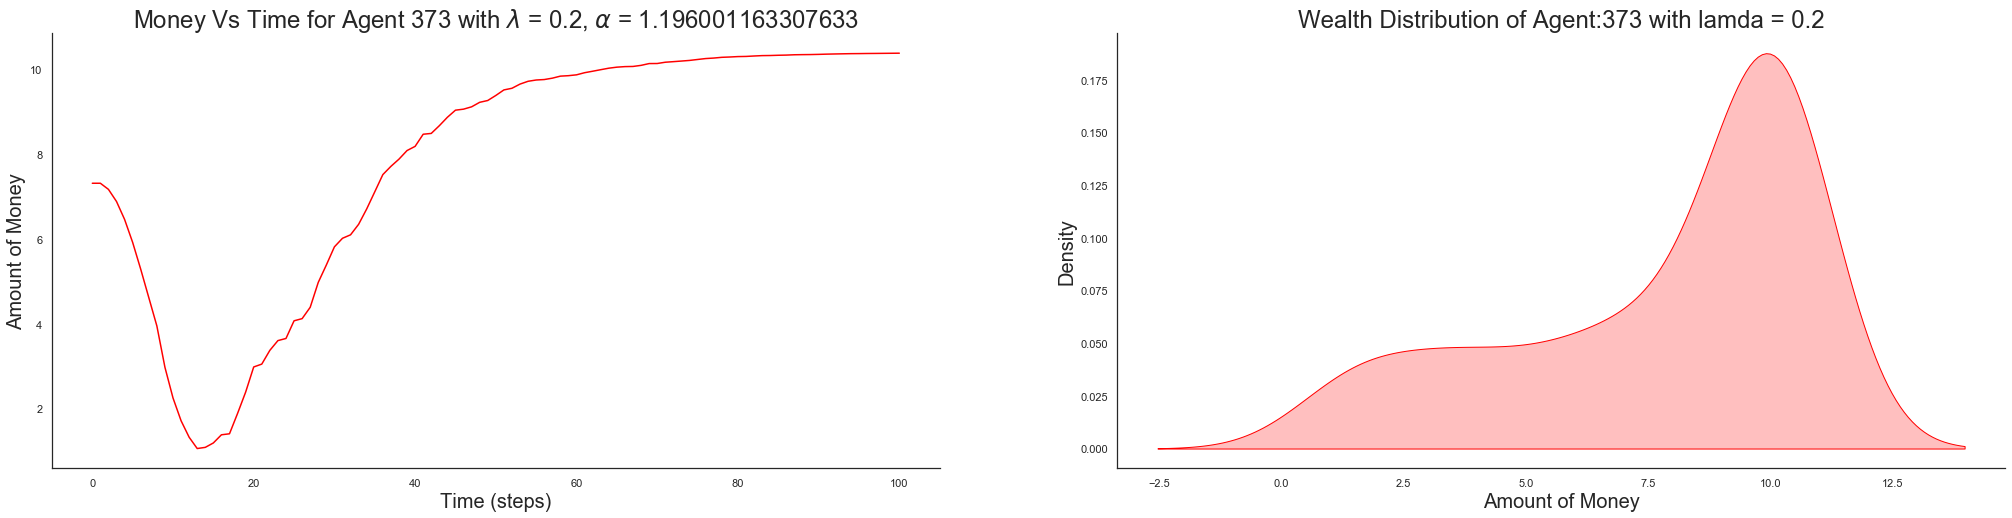

In [87]:
agent = random.randint(0,N-1)
time = (data2.loc[data2['AgentID']==agent, 'Step'].reset_index(drop = True)).to_numpy()
money = (data2.loc[data2['AgentID']==agent, 'k_t'].reset_index(drop = True)).to_numpy()
lamda = data2.loc[data2['AgentID'] == agent, 'lamda'].reset_index(drop = True)[0]
alpha = data2.loc[data2['AgentID'] == agent, 'alpha'].reset_index(drop = True)[0]

sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize =(35,8))
ax[0].plot(time,money, color = "red")
ax[0].set_title("Money Vs Time for Agent {} with $\lambda$ = {}, $\\alpha$ = {}".format(agent,lamda,alpha), fontsize = 24)
ax[0].set_xlabel("Time (steps)", fontsize = 20)
ax[0].set_ylabel("Amount of Money", fontsize = 20)
#a = plt.gca()
#ax[0].yaxis.grid()
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

sns.kdeplot(money, fill =True, ax = ax[1], color = 'red')
ax[1].set_title("Wealth Distribution of Agent:{} with lamda = {}".format(agent, lamda), fontsize = 24)
ax[1].set_xlabel("Amount of Money", fontsize = 20)
ax[1].set_ylabel("Density", fontsize = 20)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.savefig(file2+"\Lamda{}_Agent{}.png".format(lamda,agent),bbox_inches='tight')

In [88]:
data2.loc[data2.AgentID==agent]

,Step,AgentID,slope,k_t,income,consumption,lamda,alpha,technology
373,0,373,-0.149846,7.314490,2.478292,0.514511,0.2,1.196001,H
873,1,373,-0.149846,7.314490,2.478292,0.694690,0.2,1.196001,H
1373,2,373,-0.149846,7.170347,2.452182,0.893624,0.2,1.196001,H
1873,3,373,-0.147863,6.884222,3.180286,1.105613,0.2,1.196001,H
2373,4,373,-0.143738,6.461884,2.319448,1.315448,0.2,1.196001,H
...,...,...,...,...,...,...,...,...,...
48373,96,373,-0.181335,10.374883,2.977078,0.001583,0.2,1.196001,H
48873,97,373,-0.181354,10.376310,2.263641,0.000732,0.2,1.196001,H
49373,98,373,-0.181365,10.378211,2.977573,0.000336,0.2,1.196001,H
49873,99,373,-0.181380,10.380153,2.258843,0.000009,0.2,1.196001,H


In this type of initialization, by analysing the plots and data of many agents, a general trend couldn't be idenitified. 

There were many agents who started off with a high capital, high alpha, who has large consumption in the first few timesteps and eventually attains a low capital state due to the small $\lambda$ factor. In some cases like in the case of agent 23 (above) their capital becomes insufficient to invest in high technology and hence they invest in low technology for a period. At the same time due to their large $\lambda$ and large $\alpha$ they eventually comes out of this (small consumption) and make investment in high technology. At the same tim, there are agents like 373 with small $\lambda$ but high $\alpha$ who spend a lots of their capital, for trade and consumption, before eventually, going to a high capital state, all the while spending capital on high technology. In this case, $\alpha$ overrides $\lambda$ but this happens only after a long period of time. The same applies to some agents with high $\alpha$, low capital, low $\lambda$ investing only in low technology, and ending up in low technology. Similarly, some agents under the same condition: high $\alpha$, low capital, high $\lambda$ making a transistion from low to high technology in the end.

In general, the behavior remains almost the same.

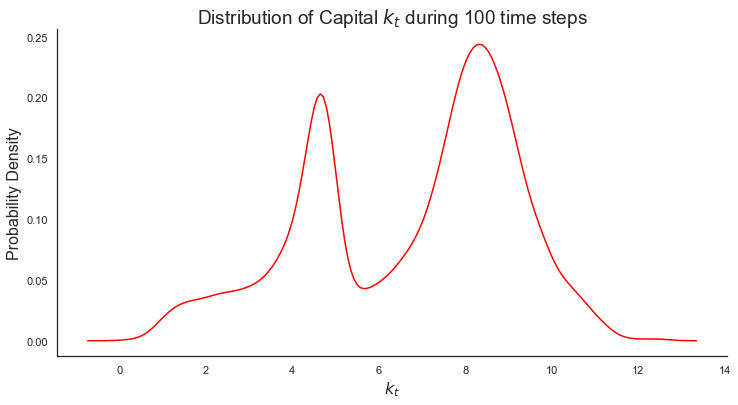

In [89]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("white")
sns.kdeplot(data2.k_t, color = "red")
plt.xlabel("$k_t$", fontsize = 16)
plt.ylabel("Probability Density", fontsize = 16)
plt.title("Distribution of Capital $k_t$ during {} time steps".format(steps), fontsize = 19) 
a = plt.gca()
#plt.grid('on')
#a.yaxis.grid()
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)
plt.savefig(file2 +"\kdeplot_k");